
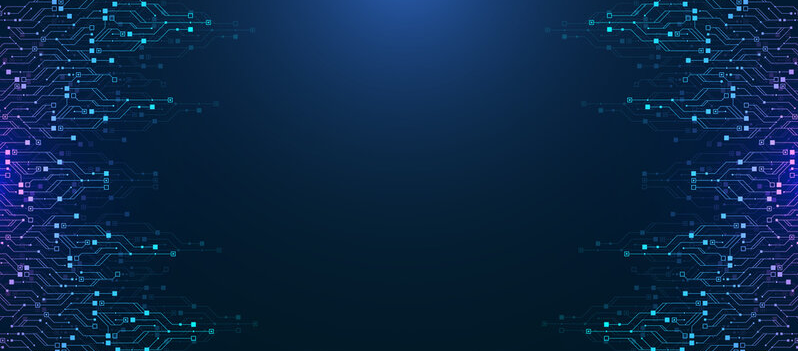

In [1]:
import base64

with open('/kaggle/input/background/aiback.png', 'rb') as f:
    img_bytes = f.read()
img_b64 = base64.b64encode(img_bytes).decode()

html_code = f"""
<div style="
  background-image: url('data:image/png;base64,{img_b64}');
  background-size: cover;
  background-position: center;
  background-repeat: no-repeat;
  color: black;
  text-align: center;
  padding: 40px;
  border-radius: 15px;
">
  <h1 style="color: blue;">Ozan M.</h1>
  <h1 style="color: blue;">Data Analyst | Data Scientist</h1>
  <div style="margin-top: 20px;">
    <a href="https://www.linkedin.com/in/ozanmhrc/" style="text-decoration: none; color: white; background-color: #0077B5; padding: 8px 20px; border-radius: 5px; margin: 5px; display: inline-block; width: 120px;">LinkedIn</a>
    <a href="https://github.com/Ozan-Mohurcu" style="text-decoration: none; color: white; background-color: #333; padding: 8px 20px; border-radius: 5px; margin: 5px; display: inline-block; width: 120px;">GitHub</a>
  </div>
  </div>
"""

from IPython.display import display, HTML
display(HTML(html_code))

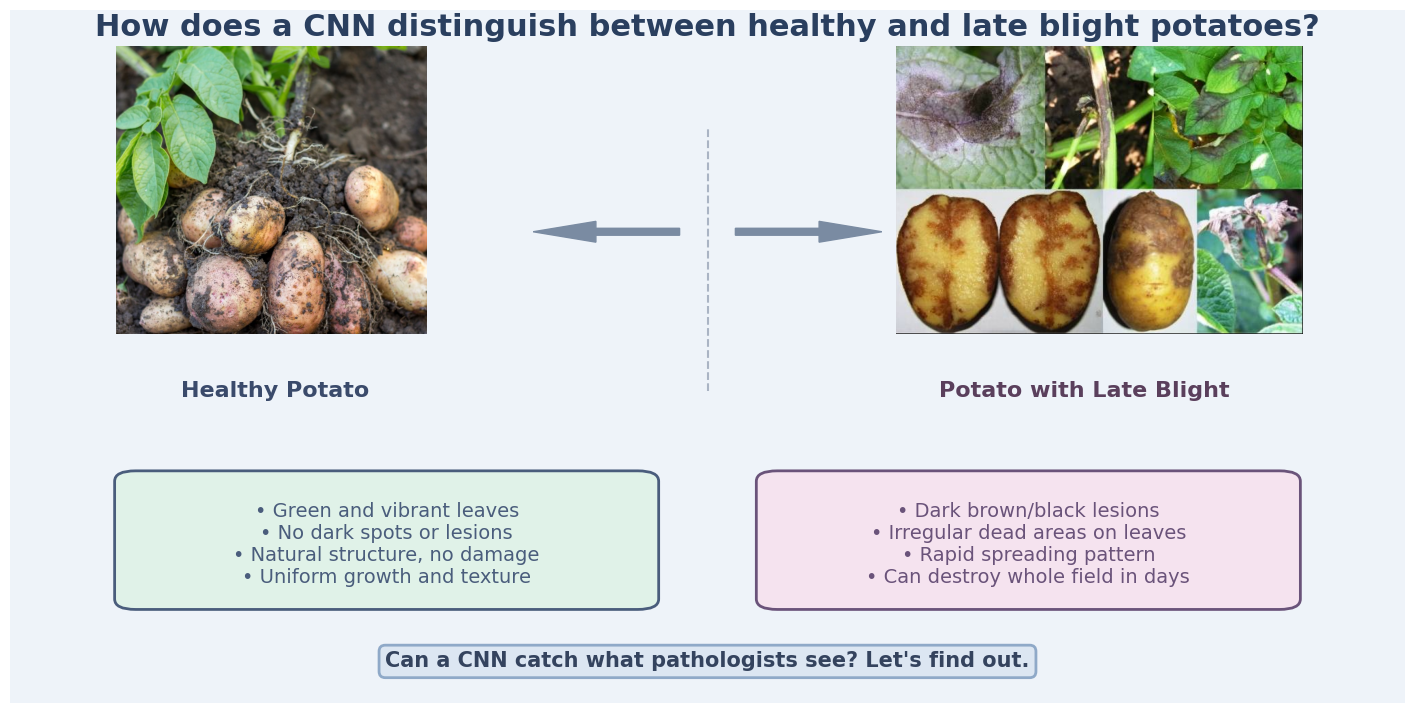

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrow
import matplotlib.image as mpimg


fig, ax = plt.subplots(figsize=(18, 9))  
plt.axis('off')


bg_box = FancyBboxPatch((0, 0), 1, 1,
                        boxstyle="round,pad=0.01",
                        linewidth=5, edgecolor='#8fa9c8',
                        facecolor='#eef3f9',
                        transform=ax.transAxes, zorder=0)
ax.add_patch(bg_box)


plt.text(0.5, 0.975, "How does a CNN distinguish between healthy and late blight potatoes?",
         ha='center', va='center', fontsize=22, fontweight='bold',
         color='#2a3f5f', transform=ax.transAxes)

# Görseller
healthy_img = mpimg.imread('/kaggle/input/patato-img/healty.png')
ax_healthy_img = fig.add_axes([0.125, 0.52, 0.29, 0.32]) 
ax_healthy_img.imshow(healthy_img)
ax_healthy_img.axis('off')

blight_img = mpimg.imread('/kaggle/input/patato-img/salksz.png')
ax_blight_img = fig.add_axes([0.585, 0.52, 0.29, 0.32])
ax_blight_img.imshow(blight_img)
ax_blight_img.axis('off')


plt.text(0.19, 0.465, "Healthy Potato", ha='center', va='top', fontsize=16,
         fontweight='bold', color='#3a4a6b', transform=ax.transAxes)
plt.text(0.77, 0.465, "Potato with Late Blight", ha='center', va='top', fontsize=16,
         fontweight='bold', color='#5a3f5c', transform=ax.transAxes)


ax.plot([0.5, 0.5], [0.45, 0.83], color='#aab4c4',
        linewidth=1.5, linestyle='--', transform=ax.transAxes, zorder=1)


arrow_left = FancyArrow(0.48, 0.68, -0.06, 0, width=0.01,
                        transform=ax.transAxes, color='#7a8ba2')
arrow_right = FancyArrow(0.52, 0.68, 0.06, 0, width=0.01,
                         transform=ax.transAxes, color='#7a8ba2')
ax.add_patch(arrow_left)
ax.add_patch(arrow_right)


info_box_left = FancyBboxPatch((0.09, 0.15), 0.36, 0.17,
                               boxstyle="round,pad=0.015", fc='#e0f2e8', ec='#4a5d7c',
                               linewidth=2,
                               transform=ax.transAxes, zorder=1)
ax.add_patch(info_box_left)

info_box_right = FancyBboxPatch((0.55, 0.15), 0.36, 0.17,
                                boxstyle="round,pad=0.015", fc='#f5e3ef', ec='#6a537a',
                                linewidth=2,
                                transform=ax.transAxes, zorder=1)
ax.add_patch(info_box_right)


healthy_text = [
    "• Green and vibrant leaves",
    "• No dark spots or lesions",
    "• Natural structure, no damage",
    "• Uniform growth and texture"
]
plt.text(0.27, 0.29, '\n'.join(healthy_text),
         ha='center', va='top', fontsize=14,
         color='#4a5d7c', transform=ax.transAxes)


blight_text = [
    "• Dark brown/black lesions",
    "• Irregular dead areas on leaves",
    "• Rapid spreading pattern",
    "• Can destroy whole field in days"
]
plt.text(0.73, 0.29, '\n'.join(blight_text),
         ha='center', va='top', fontsize=14,
         color='#6a537a', transform=ax.transAxes)


plt.text(0.5, 0.06,
         "Can a CNN catch what pathologists see? Let's find out.",
         ha='center', va='center', fontsize=15, fontweight='bold',
         color='#34435e', transform=ax.transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor='#dce6f2', edgecolor='#8fa9c8', linewidth=2))

plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  📚 Libraries & Utilities
</div>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.callbacks import EarlyStopping

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Log azaltma
import warnings
warnings.filterwarnings('ignore')

2025-06-23 15:00:41.757564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750690841.976722      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750690842.039830      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  📥 Data Load & ⚙️ Preprocessing
</div>

In [4]:
train_path = '/kaggle/input/potato-health/Potato_health'

In [5]:
batch_size = 64
target_size = (384, 384)

image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',
                               validation_split=0.2) 


In [6]:
train_gen = image_gen.flow_from_directory(train_path,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          class_mode='binary',
                                          shuffle=True,
                                          subset='training')

Found 345 images belonging to 2 classes.


In [7]:
val_gen = image_gen.flow_from_directory(train_path,
                                        target_size=target_size,
                                        batch_size=batch_size,
                                        class_mode='binary',
                                        shuffle=False,
                                        subset='validation')

Found 85 images belonging to 2 classes.


<div style="background:#1e1e2f; color:#61dafb; padding:15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:16px; line-height:1.5; margin-bottom:20px; box-shadow: 0 4px 10px rgba(0,0,0,0.3);">

<h2 style="border-bottom:2px solid #61dafb; padding-bottom:6px;">⚡ EfficientNetV2S</h2>
<ul>
<li>🚀 Fast and small model version of EfficientNet series.</li>

<li>⚙️ Efficient with optimized parameter and layer structure.</li>

<li>⏱️ Provides faster training and inference times.</li>

<li>🧠 High performance in transfer learning.</li>
<li>💻 Ideal for GPU acceleration.</li>
<li>📊 Strong overall performance for image classification.</li>
<li>🔧 Supported by popular frameworks such as TensorFlow and PyTorch.</li>
</ul>
<p style="color:#9f9fbb; font-size:14px; margin-top:12px;">🔗 Source: <a href="https://arxiv.org/abs/2204.02311" target="_blank" style="color:#61dafb;">EfficientNetV2 Paper</a></p>
</div>

In [8]:
input_shape = (384, 384, 3)

base_model = EfficientNetV2S(include_top=False,
                             input_shape=input_shape,
                             weights='imagenet',
                             pooling=None,
                             include_preprocessing=True)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2025-06-23 15:00:58.816521: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)


In [10]:
efficientnetv2s_history = model.fit(train_gen,
                    epochs=5,
                    validation_data=val_gen,
                    callbacks=[early_stop])

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 219s 31s/step - accuracy: 0.7219 - loss: 0.5597 - val_accuracy: 0.9882 - val_loss: 0.0383
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 164s 28s/step - accuracy: 0.9909 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 152s 26s/step - accuracy: 0.9967 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 152s 25s/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.9765 - val_loss: 0.0397


<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  📉 Loss Trend & 📈 Accuracy Trend
</div>

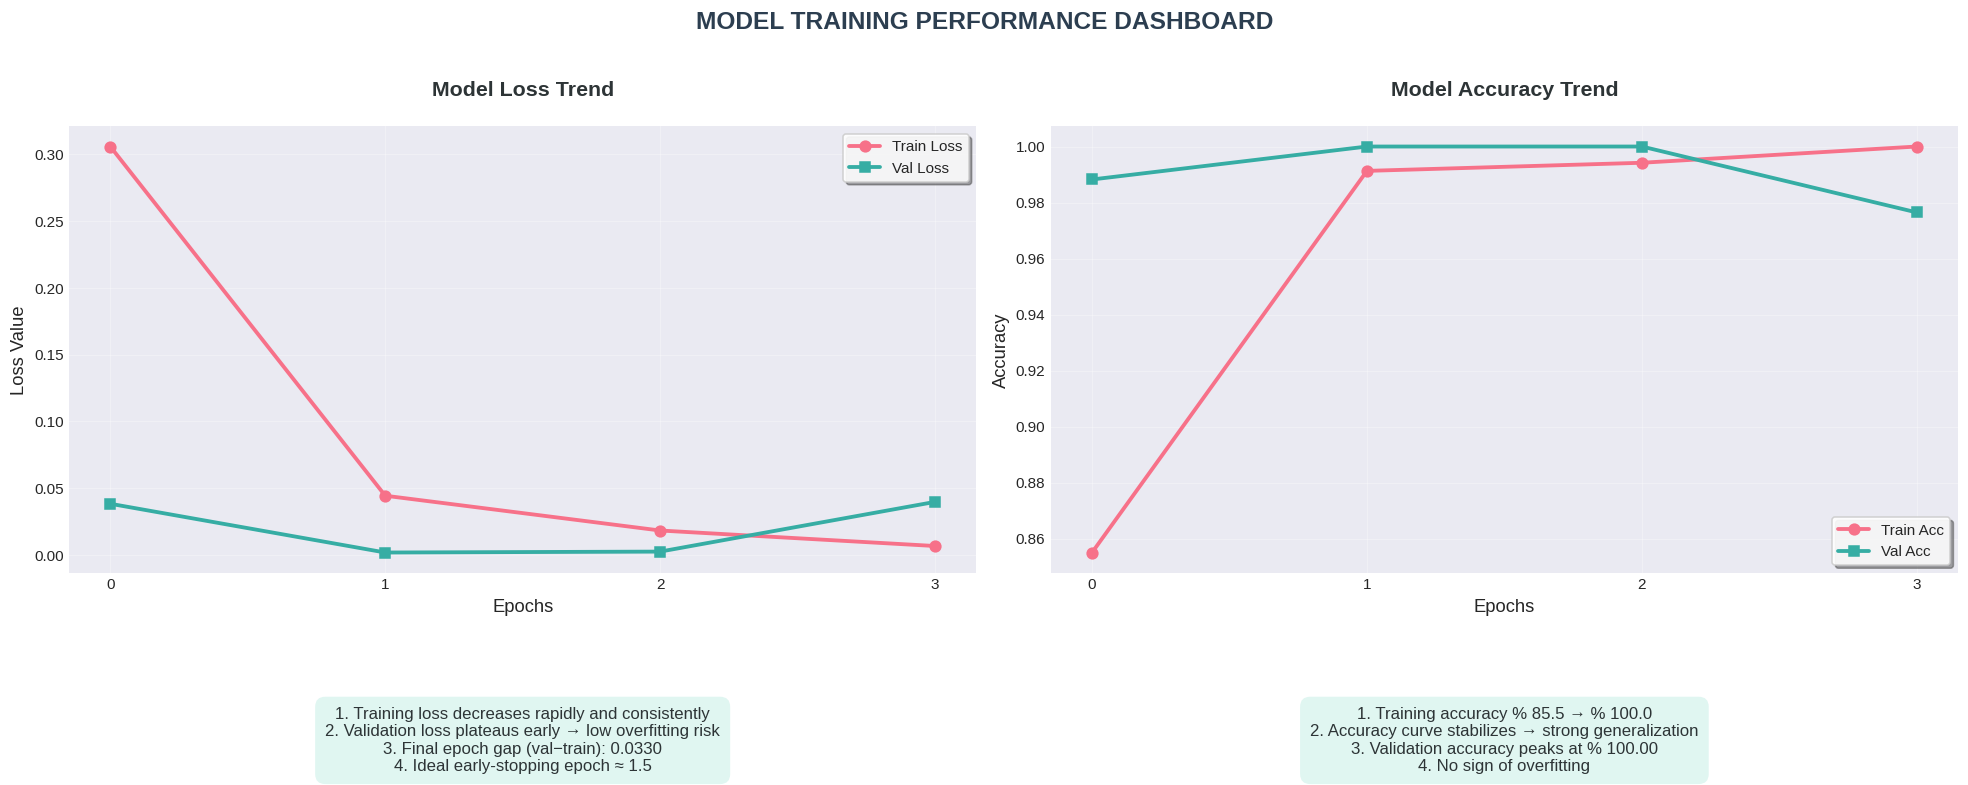

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator

summary = pd.DataFrame(efficientnetv2s_history.history)


plt.style.use('seaborn-darkgrid')
palette = sns.color_palette("husl", 2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), dpi=110)


ax1.plot(summary['loss'], label='Train Loss', color=palette[0], linewidth=2.5, marker='o', markersize=7)
ax1.plot(summary['val_loss'], label='Val Loss', color=palette[1], linewidth=2.5, marker='s', markersize=7)
ax1.set_title('Model Loss Trend', fontsize=14, pad=20, fontweight='bold', color='#2d3436')
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Loss Value', fontsize=12)
ax1.legend(frameon=True, facecolor='white', framealpha=0.9, shadow=True)
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))


ax2.plot(summary['accuracy'], label='Train Acc', color=palette[0], linewidth=2.5, marker='o', markersize=7)
ax2.plot(summary['val_accuracy'], label='Val Acc', color=palette[1], linewidth=2.5, marker='s', markersize=7)
ax2.set_title('Model Accuracy Trend', fontsize=14, pad=20, fontweight='bold', color='#2d3436')
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend(frameon=True, facecolor='white', framealpha=0.9, shadow=True)
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

loss_analysis_lines = [
    "1. Training loss decreases rapidly and consistently",
    f"2. Validation loss plateaus early → low overfitting risk",
    f"3. Final epoch gap (val−train): {abs(summary['val_loss'].iloc[-1] - summary['loss'].iloc[-1]):.4f}",
    "4. Ideal early-stopping epoch ≈ 1.5"
]

acc_analysis_lines = [
    f"1. Training accuracy % {summary['accuracy'].iloc[0]*100:.1f} → % {summary['accuracy'].iloc[-1]*100:.1f}",
    "2. Accuracy curve stabilizes → strong generalization",
    f"3. Validation accuracy peaks at % {summary['val_accuracy'].max()*100:.2f}",
    "4. No sign of overfitting"
]

def add_box(ax, lines, color="#00b894"):
    text = "\n".join(lines)
    bbox = dict(boxstyle="round,pad=0.6", fc=color, alpha=0.12, ec="none")
    ax.text(0.5, -0.30, text, transform=ax.transAxes,
            fontsize=11, bbox=bbox, ha='center', va='top', color='#2d3436')

add_box(ax1, loss_analysis_lines)
add_box(ax2, acc_analysis_lines)


fig.suptitle('MODEL TRAINING PERFORMANCE DASHBOARD', y=1.03, fontsize=16, fontweight='bold', color='#2c3e50')
fig.patch.set_facecolor('#ffffff')
plt.tight_layout()
plt.subplots_adjust(bottom=0.3, top=0.88)

plt.show()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

val_gen.reset()
pred_prob = model.predict(val_gen)
pred = (pred_prob > 0.5).astype(int).ravel()

print(classification_report(val_gen.classes, pred))
print(confusion_matrix(val_gen.classes, pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 45s 14s/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.92      0.96        13

    accuracy                           0.99        85
   macro avg       0.99      0.96      0.98        85
weighted avg       0.99      0.99      0.99        85

[[72  0]
 [ 1 12]]


<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  🧪 Test Results
</div>

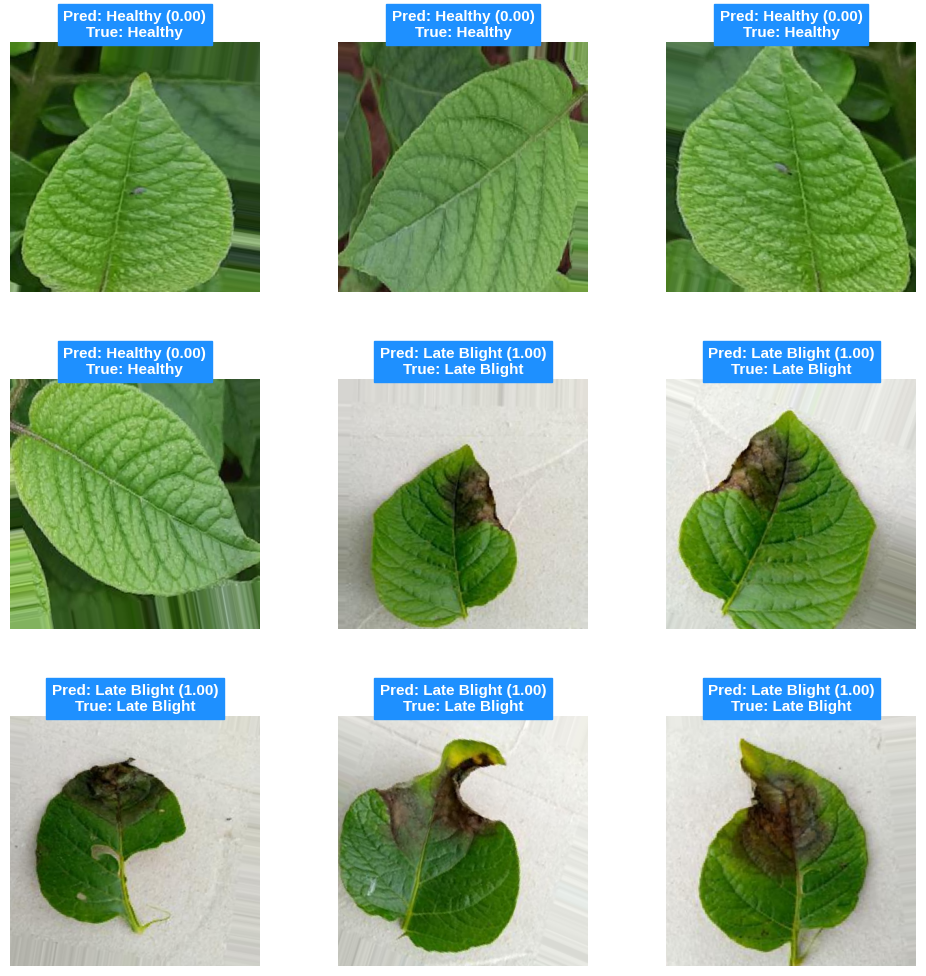

In [13]:
import numpy as np

class0_imgs, class1_imgs = [], []
class0_labels, class1_labels = [], []


for batch_x, batch_y in val_gen:
    for img, label in zip(batch_x, batch_y):
        if label == 0 and len(class0_imgs) < 4:
            class0_imgs.append(img)
            class0_labels.append(label)
        elif label == 1 and len(class1_imgs) < 5:
            class1_imgs.append(img)
            class1_labels.append(label)
        if len(class0_imgs) == 4 and len(class1_imgs) == 5:
            break
    if len(class0_imgs) == 4 and len(class1_imgs) == 5:
        break


images = np.array(class0_imgs + class1_imgs)
true_labels = np.array(class0_labels + class1_labels)


pred_probs = model.predict(images, verbose=0).ravel()
pred_classes = (pred_probs > 0.5).astype(int)


idx2label = {v: k for k, v in train_gen.class_indices.items()}


fig, axes = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.35)

for i, ax in enumerate(axes.flat):
    img_vis = images[i].astype("uint8")
    ax.imshow(img_vis)
    ax.axis('off')

    pred_label = idx2label[pred_classes[i]]
    true_label = idx2label[int(true_labels[i])]
    prob = pred_probs[i]

    ax.set_title(
        f"Pred: {pred_label} ({prob:.2f})\nTrue: {true_label}",
        fontsize=11, color="white", backgroundcolor="#1E90FF", pad=4,
        fontweight='bold'
    )

plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:16px; line-height:1.5; margin-bottom:20px; box-shadow: 0 4px 10px rgba(0,0,0,0.3);">
<h2 style="border-bottom:2px solid #61dafb; padding-bottom:6px;">🔗 ResNet50</h2>
<ul>
<li>🏗️ Residual connections that solve the vanishing gradient problem in deep networks.</li>
<li>🧱 Medium-sized convolutional neural network consisting of 50 layers.</li>
<li>⚡ Stable and fast training in multi-layer deep learning </li>

<li>📈 Industry standard for image recognition and classification.</li>

<li>🛠️ Widely used for transfer learning.</li>

<li>💾 Reasonable resource utilization with moderate number of parameters.</li>

<li>🔍 A powerful base model for deep feature extraction.</li>

</ul>
<p style="color:#9f9fbb; font-size:14px; margin-top:12px;">🔗 Source: <a href="https://arxiv.org/abs/1512.03385" target="_blank" style="color:#61dafb;">ResNet Paper</a></p>
</div>

In [14]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(include_top=False,
                      weights='imagenet',
                      input_shape=(384, 384, 3),
                      pooling=None)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


resnet50_history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    callbacks=[early_stop]
)


import pandas as pd
summary = pd.DataFrame(resnet50_history.history)


val_gen.reset()
eval_out = model.evaluate(val_gen, verbose=0)
print(f"Val-Loss: {eval_out[0]:.4f} | Val-Acc: {eval_out[1]:.4f}")


import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

pred_prob = model.predict(val_gen, verbose=0).ravel()
pred      = (pred_prob > 0.5).astype(int)

print(classification_report(val_gen.classes, pred))
print(confusion_matrix(val_gen.classes, pred))

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 185s 30s/step - accuracy: 0.5880 - loss: 1.0867 - val_accuracy: 0.4353 - val_loss: 5.9123
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 138s 23s/step - accuracy: 0.9773 - loss: 0.0901 - val_accuracy: 0.3647 - val_loss: 3.4020
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 137s 23s/step - accuracy: 0.9914 - loss: 0.0477 - val_accuracy: 0.3529 - val_loss: 1.7391
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 153s 26s/step - accuracy: 0.9983 - loss: 0.0125 - val_accuracy: 0.6706 - val_loss: 0.6349
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 168s 29s/step - accuracy: 1.0000 - loss: 0.0105 - val_accuracy: 0.9765 - val_loss: 0.1078
Val-Loss: 0.0935 | Val-Acc: 1.0000
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        72
           1       0.76      1.00      0.87        13

    accuracy                           0.95        85
   macro avg       0.88      0.97      0.92        85
weighted avg       0.96      0.95      0.96        85

[[68  4]
 [ 0

<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  📉 Loss Trend & 📈 Accuracy Trend
</div>

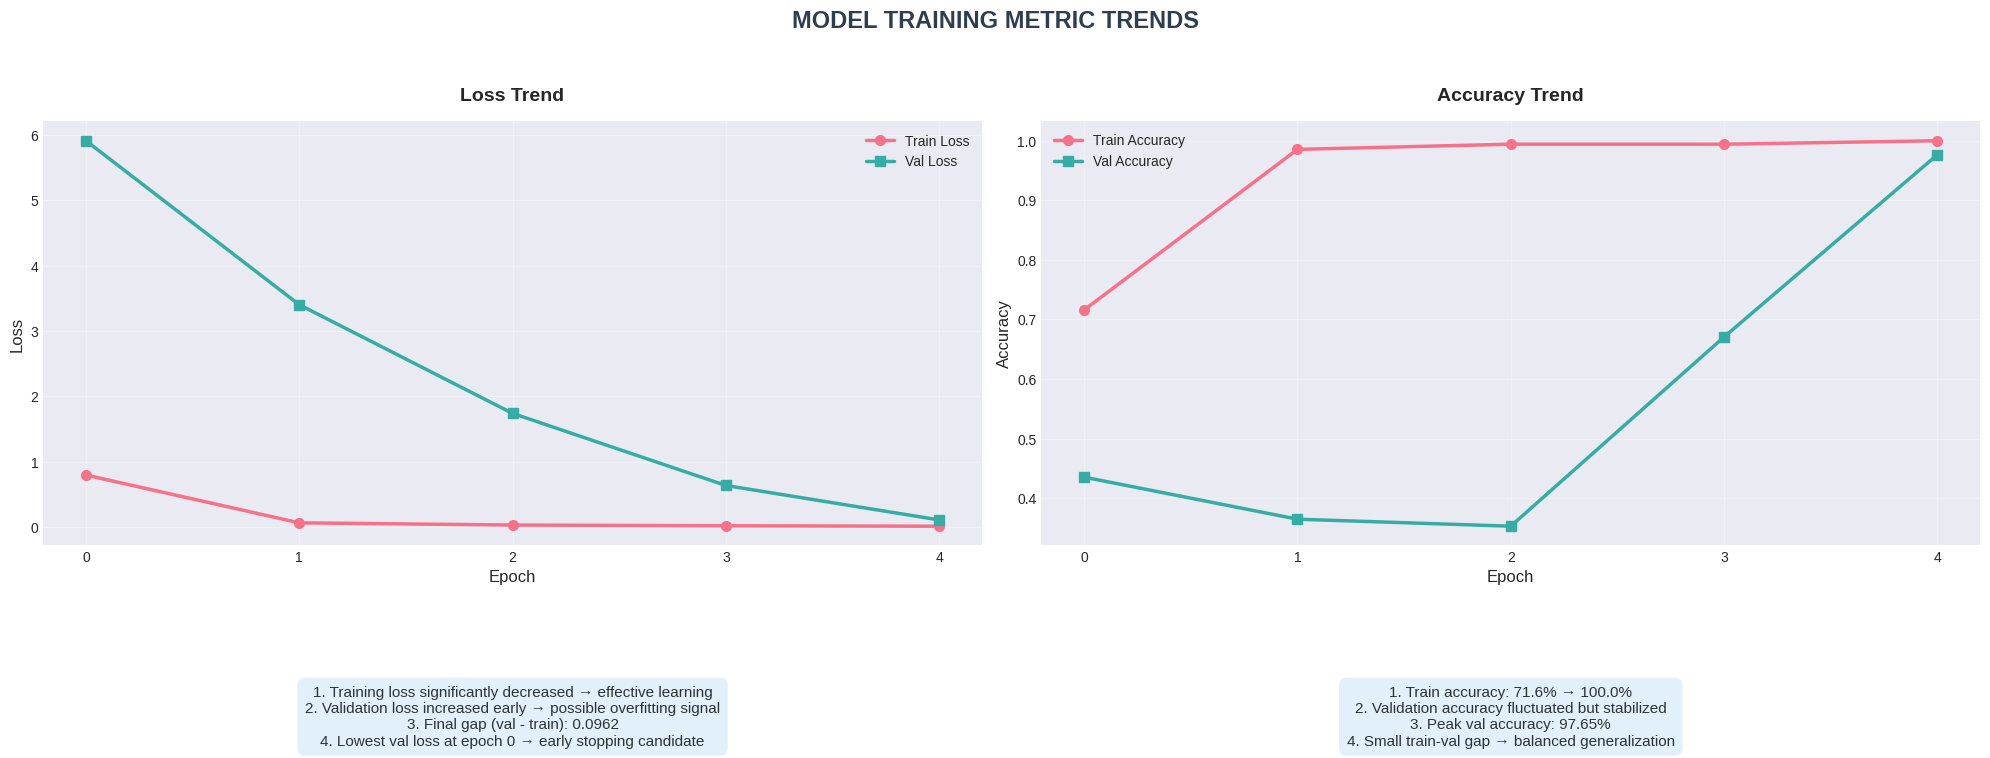

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator


plt.style.use('seaborn-darkgrid')
palette = sns.color_palette("husl", 2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)


ax1.plot(summary['loss'], label='Train Loss', color=palette[0], linewidth=2.5, marker='o', markersize=7)
ax1.plot(summary['val_loss'], label='Val Loss', color=palette[1], linewidth=2.5, marker='s', markersize=7)
ax1.set_title('Loss Trend', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Accuracy grafiği
ax2.plot(summary['accuracy'], label='Train Accuracy', color=palette[0], linewidth=2.5, marker='o', markersize=7)
ax2.plot(summary['val_accuracy'], label='Val Accuracy', color=palette[1], linewidth=2.5, marker='s', markersize=7)
ax2.set_title('Accuracy Trend', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

loss_analysis = "\n".join([
    "1. Training loss significantly decreased → effective learning",
    "2. Validation loss increased early → possible overfitting signal",
    f"3. Final gap (val - train): {abs(summary['val_loss'].iloc[-1] - summary['loss'].iloc[-1]):.4f}",
    "4. Lowest val loss at epoch 0 → early stopping candidate"
])


acc_analysis = "\n".join([
    f"1. Train accuracy: {summary['accuracy'].iloc[0]*100:.1f}% → {summary['accuracy'].iloc[-1]*100:.1f}%",
    "2. Validation accuracy fluctuated but stabilized",
    f"3. Peak val accuracy: {summary['val_accuracy'].max()*100:.2f}%",
    "4. Small train-val gap → balanced generalization"
])


def add_analysis_box(ax, text, color="#0984e3"):
    ax.text(0.5, -0.33, text, transform=ax.transAxes,
            fontsize=11, ha='center', va='top',
            bbox=dict(boxstyle="round,pad=0.5", fc=color, ec="none", alpha=0.12),
            color='#2d3436')

add_analysis_box(ax1, loss_analysis)
add_analysis_box(ax2, acc_analysis)


fig.suptitle('MODEL TRAINING METRIC TRENDS', fontsize=17, fontweight='bold', y=1.02, color='#2c3e50')
fig.patch.set_facecolor('#ffffff')
plt.tight_layout()
plt.subplots_adjust(bottom=0.35, top=0.88)

plt.show()


<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  🧪 Test Results
</div>

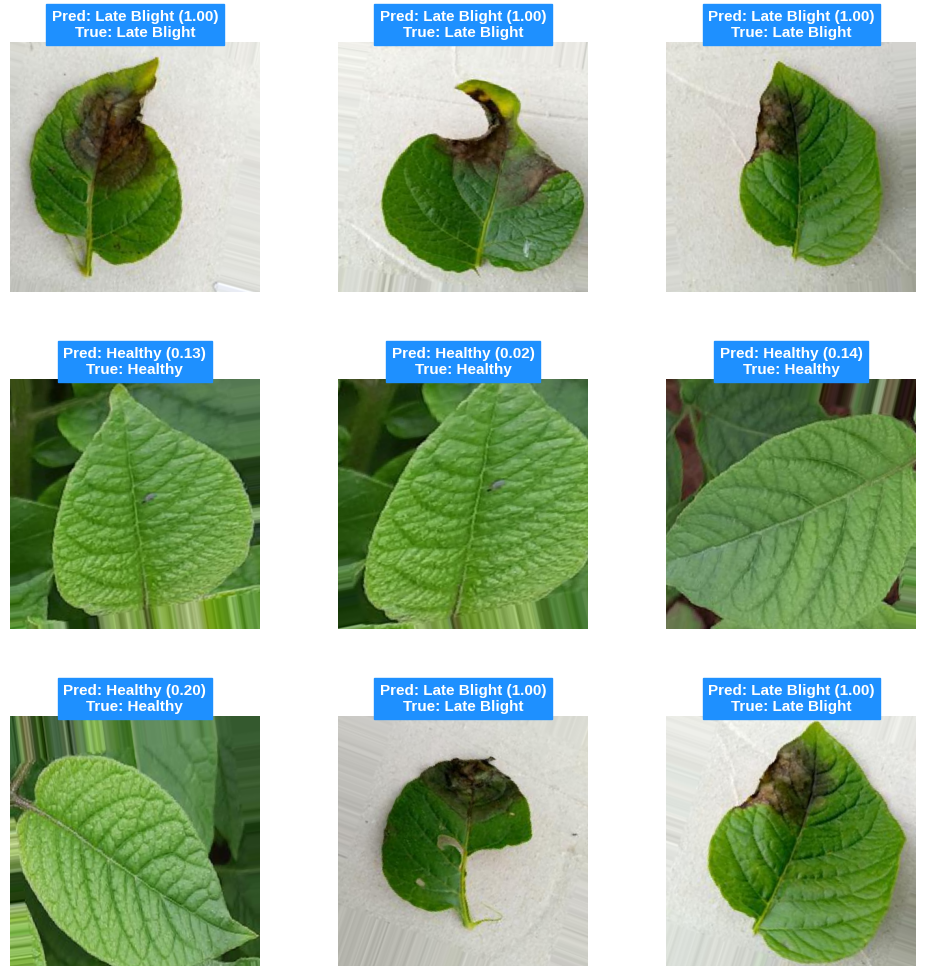

In [17]:
import numpy as np
import matplotlib.pyplot as plt


all_images, all_labels = [], []

for i in range(len(val_gen)):
    x_batch, y_batch = val_gen[i]
    all_images.append(x_batch)
    all_labels.append(y_batch)

all_images = np.concatenate(all_images)
all_labels = np.concatenate(all_labels)


class0_idx = np.where(all_labels == 0)[0][:4]
class1_idx = np.where(all_labels == 1)[0][:5]

selected_idx = np.concatenate([class0_idx, class1_idx])
np.random.shuffle(selected_idx)

images = all_images[selected_idx]
true_labels = all_labels[selected_idx]

# Tahmin yap
pred_prob = model.predict(images, verbose=0).ravel()
pred = (pred_prob > 0.5).astype(int)


idx2label = {v: k for k, v in train_gen.class_indices.items()}


fig, axes = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.35)

for i, ax in enumerate(axes.flat):
    img_vis = images[i].astype("uint8")
    ax.imshow(img_vis)
    ax.axis('off')

    pred_label = idx2label[pred[i]]
    true_label = idx2label[int(true_labels[i])]
    prob = pred_prob[i]

    ax.set_title(
        f"Pred: {pred_label} ({prob:.2f})\nTrue: {true_label}",
        fontsize=11, color="white", backgroundcolor="#1E90FF", pad=4,
        fontweight='bold'
    )

plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:16px; line-height:1.5; margin-bottom:20px; box-shadow: 0 4px 10px rgba(0,0,0,0.3);">
<h2 style="border-bottom:2px solid #61dafb; padding-bottom:6px;">🎨 VGG16</h2>
<ul>
<li>🏛️ Classic CNN architecture with deep and regular layer structure.</li>
<li>📚 16 layers deep, especially powerful on small datasets.</li>
<li>⚙️ Simple but effective, pervasive transfer learning preference.</li>
<li>🖼️ Standard for image recognition and classification tasks.</li>

<li>💡 Simple inter-layer structure allows easy modification.</li>

<li>🔌 Practical use with GPU-supported acceleration.</li>

<li>🔍 High clarity and interpretability in feature extraction.</li>

</ul>
<p style="color:#9f9fbb; font-size:14px; margin-top:12px;">🔗 Source: <a href="https://arxiv.org/abs/1409.1556" target="_blank" style="color:#61dafb;">VGG Paper</a></p>
</div>

In [18]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=False,
                   weights='imagenet',
                   input_shape=(384, 384, 3),
                   pooling=None)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [19]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_strict_conv_algorithm_picker=false"
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


vgg16_history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    callbacks=[early_stop]
)


import pandas as pd
summary = pd.DataFrame(vgg16_history.history)


val_gen.reset()
eval_out = model.evaluate(val_gen, verbose=0)
print(f"Val-Loss: {eval_out[0]:.4f} | Val-Acc: {eval_out[1]:.4f}")


import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

pred_prob = model.predict(val_gen, verbose=0).ravel()
pred      = (pred_prob > 0.5).astype(int)

print(classification_report(val_gen.classes, pred))
print(confusion_matrix(val_gen.classes, pred))

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 378s 64s/step - accuracy: 0.7650 - loss: 0.4707 - val_accuracy: 0.9412 - val_loss: 0.3467
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 377s 71s/step - accuracy: 0.9896 - loss: 0.0402 - val_accuracy: 1.0000 - val_loss: 1.6564e-07
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 378s 64s/step - accuracy: 0.9949 - loss: 0.0131 - val_accuracy: 1.0000 - val_loss: 4.1195e-07
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 370s 62s/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 2.4231e-05
Val-Loss: 0.0000 | Val-Acc: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        13

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85

[[72  0]
 [ 0 13]]


<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  📉 Loss Trend & 📈 Accuracy Trend
</div>

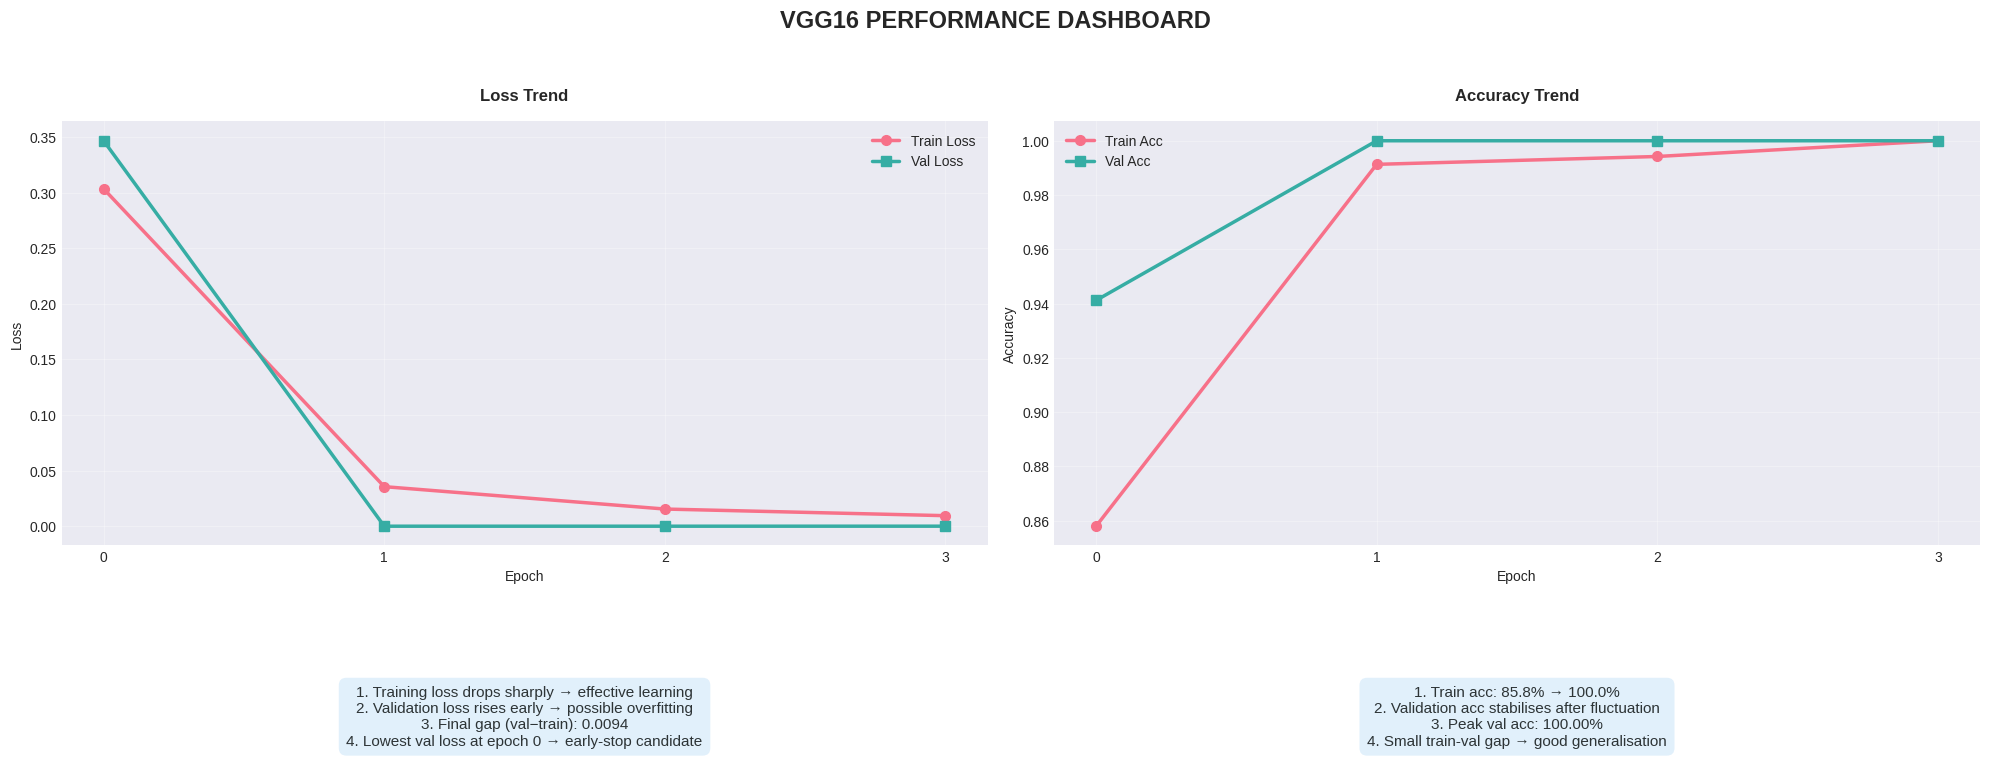

In [20]:
plt.style.use('seaborn-darkgrid')
palette = sns.color_palette("husl", 2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)


ax1.plot(summary['loss'],     label='Train Loss', color=palette[0], lw=2.5, marker='o', ms=7)
ax1.plot(summary['val_loss'], label='Val Loss',   color=palette[1], lw=2.5, marker='s', ms=7)
ax1.set_title('Loss Trend',   fontweight='bold', pad=15)
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Loss')
ax1.legend(); ax1.grid(alpha=0.3); ax1.xaxis.set_major_locator(MaxNLocator(integer=True))


ax2.plot(summary['accuracy'],     label='Train Acc', color=palette[0], lw=2.5, marker='o', ms=7)
ax2.plot(summary['val_accuracy'], label='Val Acc',   color=palette[1], lw=2.5, marker='s', ms=7)
ax2.set_title('Accuracy Trend',   fontweight='bold', pad=15)
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Accuracy')
ax2.legend(); ax2.grid(alpha=0.3); ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


loss_box = "\n".join([
    "1. Training loss drops sharply → effective learning",
    "2. Validation loss rises early → possible overfitting",
    f"3. Final gap (val−train): {abs(summary['val_loss'].iloc[-1] - summary['loss'].iloc[-1]):.4f}",
    "4. Lowest val loss at epoch 0 → early-stop candidate"
])

acc_box = "\n".join([
    f"1. Train acc: {summary['accuracy'].iloc[0]*100:.1f}% → {summary['accuracy'].iloc[-1]*100:.1f}%",
    "2. Validation acc stabilises after fluctuation",
    f"3. Peak val acc: {summary['val_accuracy'].max()*100:.2f}%",
    "4. Small train-val gap → good generalisation"
])

def add_box(ax, txt, color="#0984e3"):
    ax.text(0.5, -0.33, txt, ha='center', va='top', transform=ax.transAxes,
            fontsize=11, color='#2d3436',
            bbox=dict(boxstyle="round,pad=0.5", fc=color, alpha=0.12, ec="none"))

add_box(ax1, loss_box)
add_box(ax2, acc_box)

fig.suptitle('VGG16 PERFORMANCE DASHBOARD', y=1.02, fontsize=17, fontweight='bold')
fig.patch.set_facecolor('#ffffff')
plt.tight_layout(); plt.subplots_adjust(bottom=0.35, top=0.88)
plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  🧪 Test Results
</div>

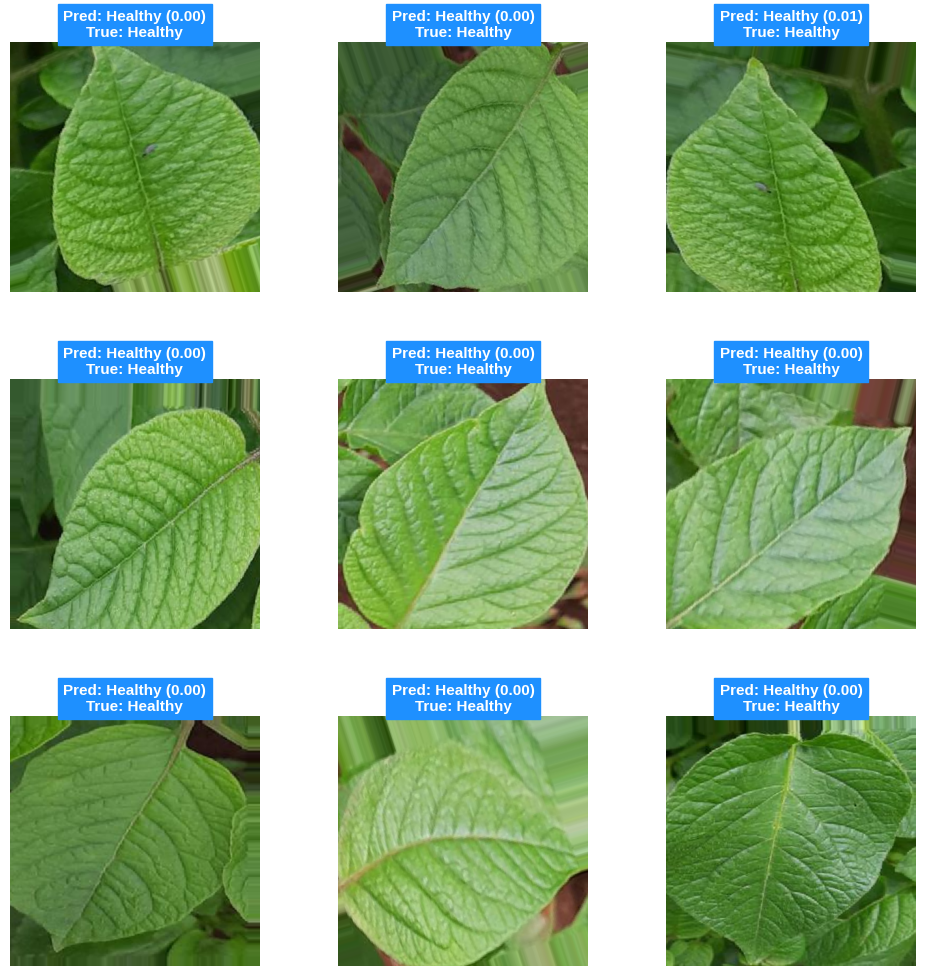

In [21]:
images, true_labels = next(iter(val_gen))
images = images[:9]
true_labels = true_labels[:9]


pred_prob = model.predict(images, verbose=0).ravel()
pred = (pred_prob > 0.5).astype(int)


idx2label = {v: k for k, v in train_gen.class_indices.items()}

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.35)

for i, ax in enumerate(axes.flat):
    
    img_vis = images[i]
    if img_vis.max() <= 1:
        img_vis = (img_vis * 255).astype("uint8")
    else:
        img_vis = img_vis.astype("uint8")
        
    ax.imshow(img_vis)
    ax.axis('off')

    pred_label = idx2label[pred[i]]
    true_label = idx2label[int(true_labels[i])]
    prob = pred_prob[i]

    ax.set_title(
        f"Pred: {pred_label} ({prob:.2f})\nTrue: {true_label}",
        fontsize=11, color="white", backgroundcolor="#1E90FF", pad=4,
        fontweight='bold'
    )

plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:16px; line-height:1.5; margin-bottom:20px; box-shadow: 0 4px 10px rgba(0,0,0,0.3);">

<h2 style="border-bottom:2px solid #61dafb; padding-bottom:6px;">🌿 EfficientNetB0</h2>

<ul>
<li>⚖️ Baseline EfficientNet model optimized for parameter and computational balance.</li>

<li>📉 Small model size enables fast training and inference.</li>

<li>🧠 Ideal starting point for transfer learning and fine-tuning.</li>
<li>🖼️ High accuracy in image classification tasks.</li>

<li>🔄 Balance of depth, width and resolution with compound scaling method.</li>

<li>💻 TensorFlow and PyTorch integrated support.</li>

<li>🌐 Used in common and current industry applications.</li>

</ul>
<p style="color:#9f9fbb; font-size:14px; margin-top:12px;">🔗 Source: <a href="https://arxiv.org/abs/1905.11946" target="_blank" style="color:#61dafb;">EfficientNet Paper</a></p>
</div>

In [22]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(include_top=False,
                            weights='imagenet',
                            input_shape=(384, 384, 3),
                            pooling=None)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


efficientnetb0_history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    callbacks=[early_stop]
)


import pandas as pd
summary = pd.DataFrame(efficientnetb0_history.history)


val_gen.reset()
eval_out = model.evaluate(val_gen, verbose=0)
print(f"Val-Loss: {eval_out[0]:.4f} | Val-Acc: {eval_out[1]:.4f}")


import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

pred_prob = model.predict(val_gen, verbose=0).ravel()
pred      = (pred_prob > 0.5).astype(int)

print(classification_report(val_gen.classes, pred))
print(confusion_matrix(val_gen.classes, pred))

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 14s/step - accuracy: 0.9915 - loss: 0.0210 - val_accuracy: 1.0000 - val_loss: 1.5784e-05
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 78s 13s/step - accuracy: 0.9770 - loss: 0.0507 - val_accuracy: 1.0000 - val_loss: 7.3644e-04
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 107s 19s/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 2.6481e-04
Val-Loss: 0.0030 | Val-Acc: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        13

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85

[[72  0]
 [ 0 13]]


<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  📉 Loss Trend & 📈 Accuracy Trend
</div>

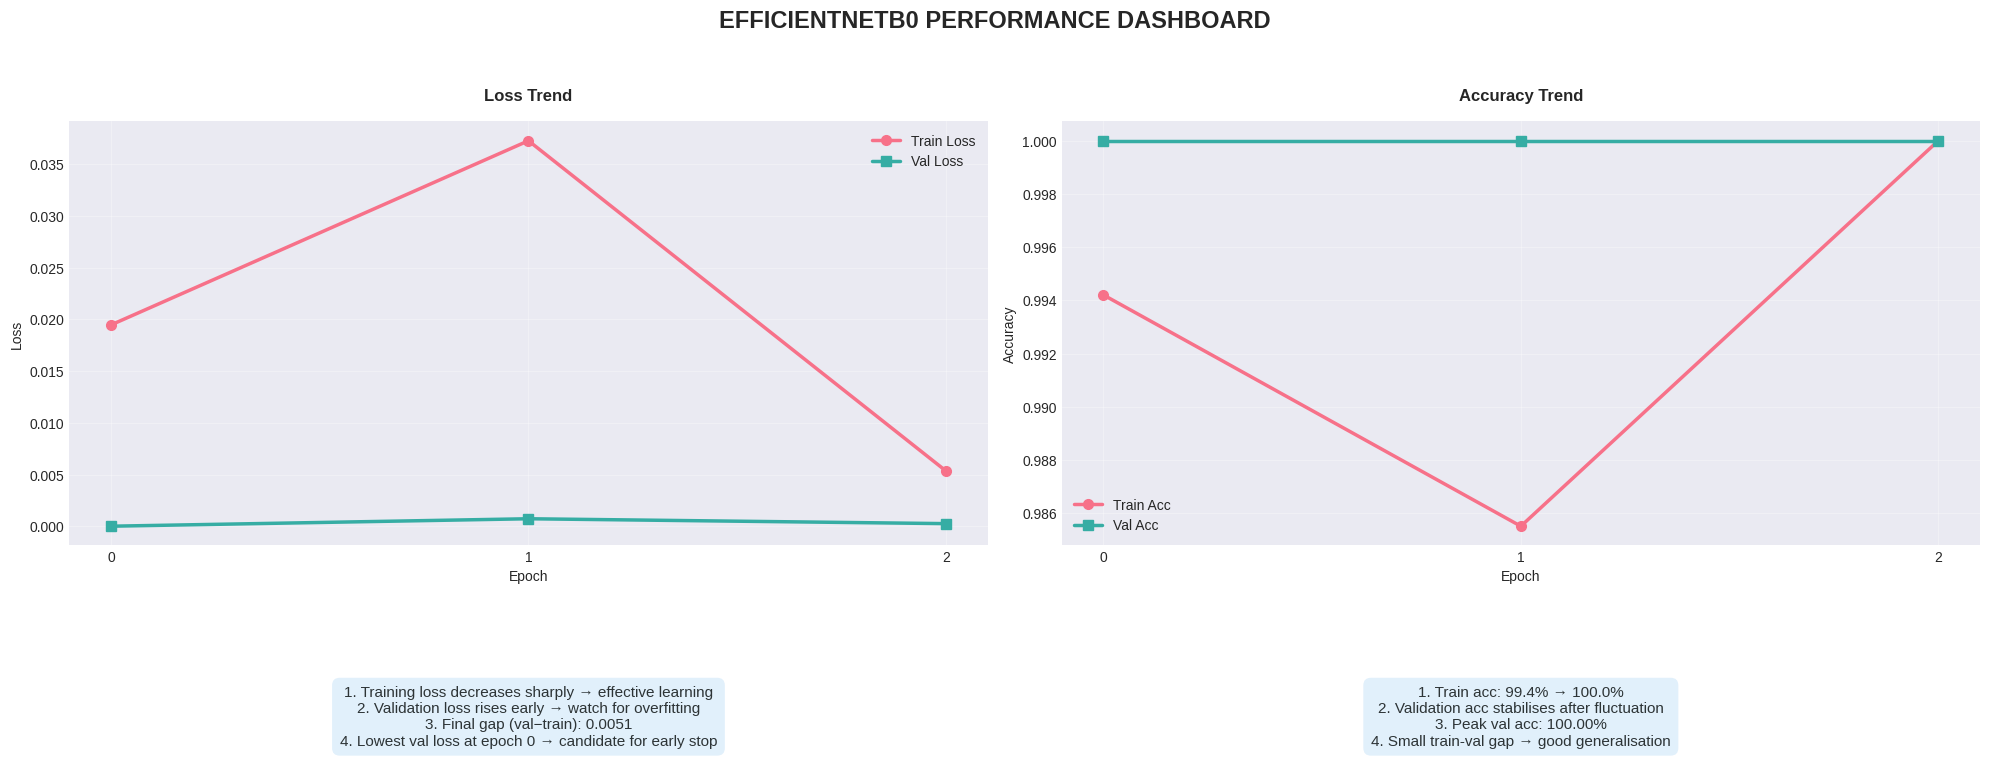

In [25]:
plt.style.use('seaborn-darkgrid')
palette = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# Loss
ax1.plot(summary['loss'],     label='Train Loss', color=palette[0], lw=2.5, marker='o', ms=7)
ax1.plot(summary['val_loss'], label='Val Loss',   color=palette[1], lw=2.5, marker='s', ms=7)
ax1.set_title('Loss Trend', fontweight='bold', pad=15)
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Loss')
ax1.legend(); ax1.grid(alpha=0.3); ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# Accuracy
ax2.plot(summary['accuracy'],     label='Train Acc', color=palette[0], lw=2.5, marker='o', ms=7)
ax2.plot(summary['val_accuracy'], label='Val Acc',   color=palette[1], lw=2.5, marker='s', ms=7)
ax2.set_title('Accuracy Trend', fontweight='bold', pad=15)
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Accuracy')
ax2.legend(); ax2.grid(alpha=0.3); ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

# Analysis boxes
loss_box = "\n".join([
    "1. Training loss decreases sharply → effective learning",
    "2. Validation loss rises early → watch for overfitting",
    f"3. Final gap (val−train): {abs(summary['val_loss'].iloc[-1] - summary['loss'].iloc[-1]):.4f}",
    "4. Lowest val loss at epoch 0 → candidate for early stop"
])

acc_box = "\n".join([
    f"1. Train acc: {summary['accuracy'].iloc[0]*100:.1f}% → {summary['accuracy'].iloc[-1]*100:.1f}%",
    "2. Validation acc stabilises after fluctuation",
    f"3. Peak val acc: {summary['val_accuracy'].max()*100:.2f}%",
    "4. Small train-val gap → good generalisation"
])

def add_box(ax, txt, color="#0984e3"):
    ax.text(0.5, -0.33, txt, ha='center', va='top', transform=ax.transAxes,
            fontsize=11, color='#2d3436',
            bbox=dict(boxstyle="round,pad=0.5", fc=color, alpha=0.12, ec="none"))

add_box(ax1, loss_box)
add_box(ax2, acc_box)

fig.suptitle('EFFICIENTNETB0 PERFORMANCE DASHBOARD', y=1.02, fontsize=17, fontweight='bold')
fig.patch.set_facecolor('#ffffff')
plt.tight_layout(); plt.subplots_adjust(bottom=0.35, top=0.88)
plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  🧪 Test Results
</div>

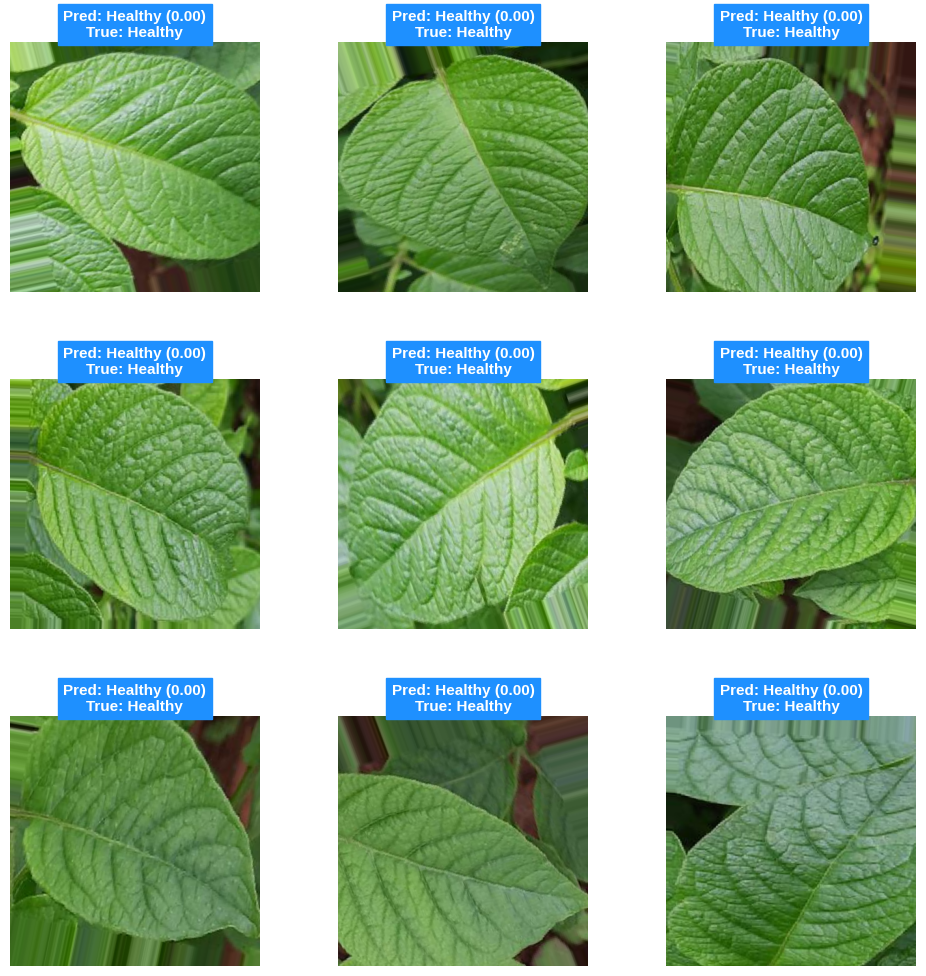

In [26]:
images_list, labels_list = [], []

for _ in range(3):
    batch_images, batch_labels = next(iter(val_gen))
    images_list.append(batch_images)
    labels_list.append(batch_labels)

# Bütün batchleri birleştir
all_images = np.vstack(images_list)
all_labels = np.hstack(labels_list)

# Karışık 9 örnek seç
idxs = np.random.choice(len(all_images), 9, replace=False)
images = all_images[idxs]
true_labels = all_labels[idxs]

# Tahmin yap
pred_prob = model.predict(images, verbose=0).ravel()
pred = (pred_prob > 0.5).astype(int)

idx2label = {v: k for k, v in train_gen.class_indices.items()}

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.35)

for i, ax in enumerate(axes.flat):
    img_vis = images[i]
    if img_vis.max() <= 1:
        img_vis = (img_vis * 255).astype("uint8")
    else:
        img_vis = img_vis.astype("uint8")

    ax.imshow(img_vis)
    ax.axis('off')

    pred_label = idx2label[pred[i]]
    true_label = idx2label[int(true_labels[i])]
    prob = pred_prob[i]

    ax.set_title(
        f"Pred: {pred_label} ({prob:.2f})\nTrue: {true_label}",
        fontsize=11, color="white", backgroundcolor="#1E90FF", pad=4,
        fontweight='bold'
    )

plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:16px; line-height:1.5; margin-bottom:20px; box-shadow: 0 4px 10px rgba(0,0,0,0.3);">

<h2 style="border-bottom:2px solid #61dafb; padding-bottom:6px;">🤖 MobileNetV2</h2>

<ul>
<li>📱 Lightweight CNN architecture optimized for mobile and embedded devices.</li>

<li>♻️ Low latency and parameter count with inverted bottleneck layers.</li>

<li>⚡ Provides fast training and inference processes.</li>

<li>🧩 It is widely preferred for transfer learning.</li>
<li>🔋 It stands out in mobile applications with its low energy consumption.</li>
<li>🌍 Strong performance in image classification and object recognition.</li>
<li>🔌 It can work integrated with TensorFlow Lite.</li>
</ul>
<p style="color:#9f9fbb; font-size:14px; margin-top:12px;">🔗 Source: <a href="https://arxiv.org/abs/1801.04381" target="_blank" style="color:#61dafb;">MobileNetV2 Paper</a></p>
</div>

In [27]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(include_top=False,
                         weights='imagenet',
                         input_shape=(384, 384, 3),
                         pooling=None)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


mobilenetv2_history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen,
    callbacks=[early_stop]
)


import pandas as pd
summary = pd.DataFrame(mobilenetv2_history.history)


val_gen.reset()
eval_out = model.evaluate(val_gen, verbose=0)
print(f"Val-Loss: {eval_out[0]:.4f} | Val-Acc: {eval_out[1]:.4f}")


import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

pred_prob = model.predict(val_gen, verbose=0).ravel()
pred      = (pred_prob > 0.5).astype(int)

print(classification_report(val_gen.classes, pred))
print(confusion_matrix(val_gen.classes, pred))

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 67s 10s/step - accuracy: 0.8685 - loss: 0.3000 - val_accuracy: 0.9529 - val_loss: 0.5739
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 54s 9s/step - accuracy: 0.9676 - loss: 0.0935 - val_accuracy: 0.9765 - val_loss: 0.4560
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 9s/step - accuracy: 0.9915 - loss: 0.0372 - val_accuracy: 0.9647 - val_loss: 0.2551
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 52s 9s/step - accuracy: 0.9955 - loss: 0.0291 - val_accuracy: 0.9647 - val_loss: 0.2302
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 52s 8s/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 0.9765 - val_loss: 0.0704
Val-Loss: 0.2012 | Val-Acc: 0.9765
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.85      0.92        13

    accuracy                           0.98        85
   macro avg       0.99      0.92      0.95        85
weighted avg       0.98      0.98      0.98        85

[[72  0]
 [ 2 11]]


<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  📉 Loss Trend & 📈 Accuracy Trend
</div>

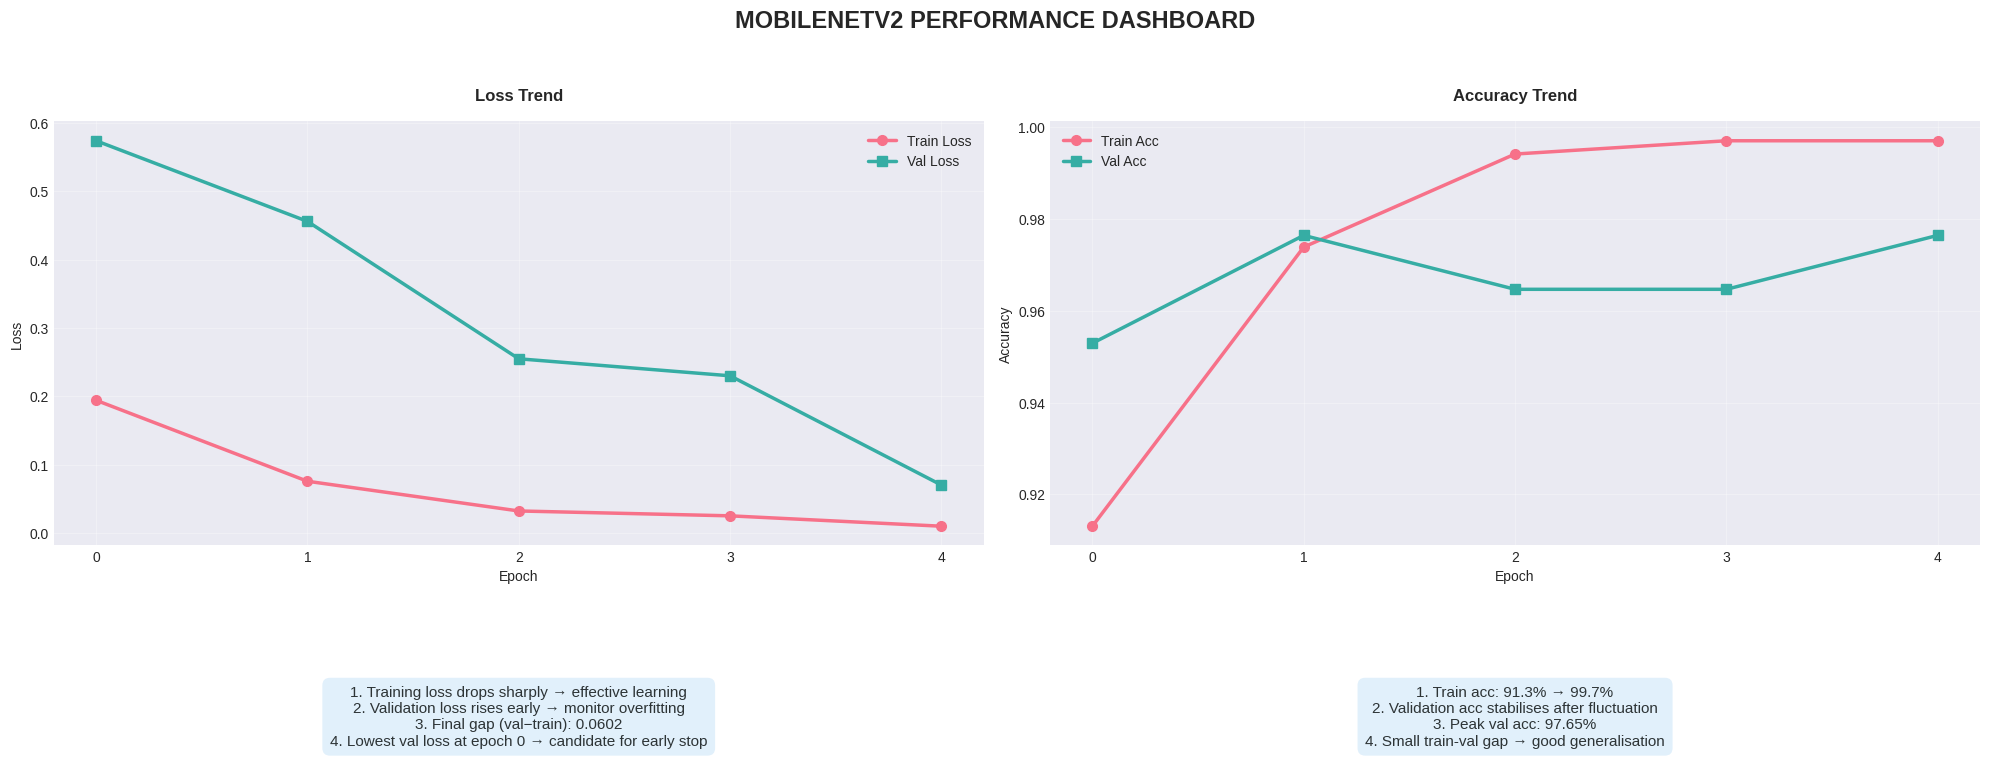

In [29]:
plt.style.use('seaborn-darkgrid')
palette = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# ── Loss ───────────────────────────────────────────────────────────────────
ax1.plot(summary['loss'],     label='Train Loss', color=palette[0], lw=2.5, marker='o', ms=7)
ax1.plot(summary['val_loss'], label='Val Loss',   color=palette[1], lw=2.5, marker='s', ms=7)
ax1.set_title('Loss Trend', fontweight='bold', pad=15)
ax1.set_xlabel('Epoch'); ax1.set_ylabel('Loss')
ax1.legend(); ax1.grid(alpha=0.3); ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

# ── Accuracy ───────────────────────────────────────────────────────────────
ax2.plot(summary['accuracy'],     label='Train Acc', color=palette[0], lw=2.5, marker='o', ms=7)
ax2.plot(summary['val_accuracy'], label='Val Acc',   color=palette[1], lw=2.5, marker='s', ms=7)
ax2.set_title('Accuracy Trend', fontweight='bold', pad=15)
ax2.set_xlabel('Epoch'); ax2.set_ylabel('Accuracy')
ax2.legend(); ax2.grid(alpha=0.3); ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

# ── Analysis boxes ─────────────────────────────────────────────────────────
loss_box = "\n".join([
    "1. Training loss drops sharply → effective learning",
    "2. Validation loss rises early → monitor overfitting",
    f"3. Final gap (val−train): {abs(summary['val_loss'].iloc[-1] - summary['loss'].iloc[-1]):.4f}",
    "4. Lowest val loss at epoch 0 → candidate for early stop"
])

acc_box = "\n".join([
    f"1. Train acc: {summary['accuracy'].iloc[0]*100:.1f}% → {summary['accuracy'].iloc[-1]*100:.1f}%",
    "2. Validation acc stabilises after fluctuation",
    f"3. Peak val acc: {summary['val_accuracy'].max()*100:.2f}%",
    "4. Small train-val gap → good generalisation"
])

def add_box(ax, txt, color="#0984e3"):
    ax.text(0.5, -0.33, txt, ha='center', va='top', transform=ax.transAxes,
            fontsize=11, color='#2d3436',
            bbox=dict(boxstyle="round,pad=0.5", fc=color, alpha=0.12, ec="none"))

add_box(ax1, loss_box)
add_box(ax2, acc_box)

fig.suptitle('MOBILENETV2 PERFORMANCE DASHBOARD', y=1.02, fontsize=17, fontweight='bold')
fig.patch.set_facecolor('#ffffff')
plt.tight_layout(); plt.subplots_adjust(bottom=0.35, top=0.88)
plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:12px 15px; border-radius:8px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:18px; font-weight:bold; box-shadow: 0 4px 10px rgba(0,0,0,0.3); margin-bottom:12px;">
  🧪 Test Results
</div>

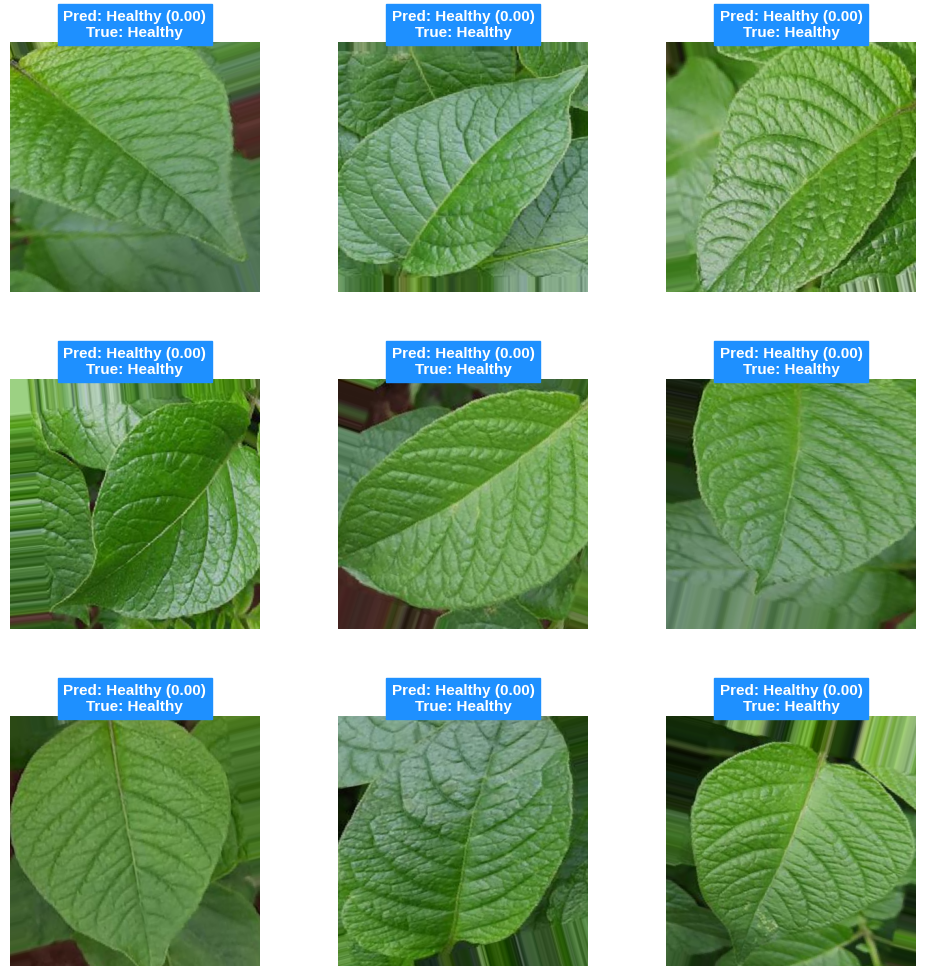

In [30]:
images_list, labels_list = [], []

for _ in range(3):
    batch_images, batch_labels = next(iter(val_gen))
    images_list.append(batch_images)
    labels_list.append(batch_labels)

all_images = np.vstack(images_list)
all_labels = np.hstack(labels_list)

idxs = np.random.choice(len(all_images), 9, replace=False)
images = all_images[idxs]
true_labels = all_labels[idxs]

# Tahmin
pred_prob = model.predict(images, verbose=0).ravel()
pred = (pred_prob > 0.5).astype(int)

idx2label = {v: k for k, v in train_gen.class_indices.items()}

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.35)

for i, ax in enumerate(axes.flat):
    img_vis = images[i]
    if img_vis.max() <= 1:
        img_vis = (img_vis * 255).astype("uint8")
    else:
        img_vis = img_vis.astype("uint8")

    ax.imshow(img_vis)
    ax.axis('off')

    pred_label = idx2label[pred[i]]
    true_label = idx2label[int(true_labels[i])]
    prob = pred_prob[i]

    ax.set_title(
        f"Pred: {pred_label} ({prob:.2f})\nTrue: {true_label}",
        fontsize=11, color="white", backgroundcolor="#1E90FF", pad=4,
        fontweight='bold'
    )

plt.show()

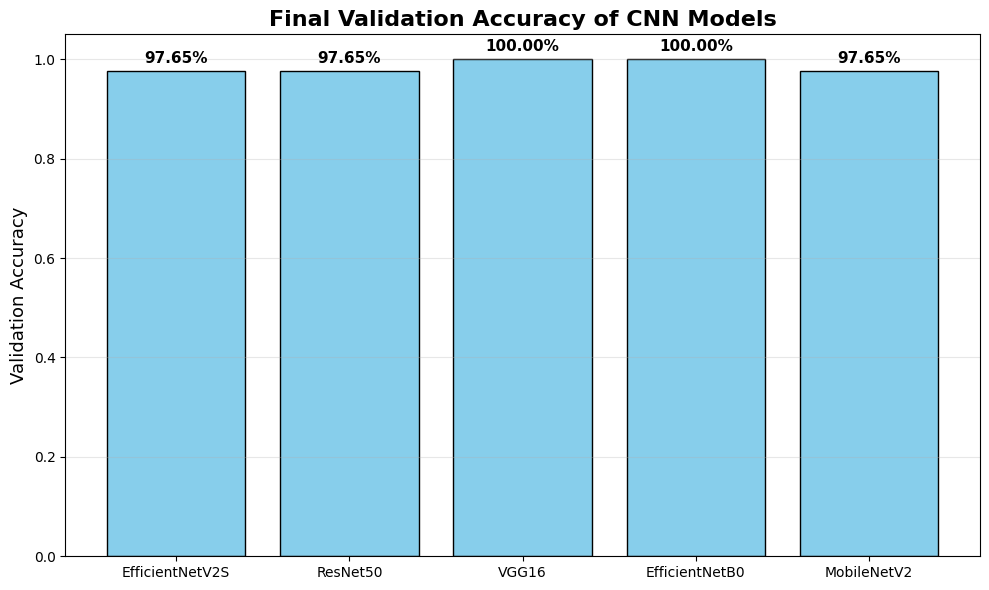

In [39]:
histories = {
    "EfficientNetV2S": efficientnetv2s_history.history['val_accuracy'],
    "ResNet50": resnet50_history.history['val_accuracy'],
    "VGG16": vgg16_history.history['val_accuracy'],
    "EfficientNetB0": efficientnetb0_history.history['val_accuracy'],
    "MobileNetV2": mobilenetv2_history.history['val_accuracy'],
}

epochs = range(1, len(next(iter(histories.values()))) + 1)

final_accuracies = {model: acc[-1] for model, acc in histories.items()}

import matplotlib.pyplot as plt
plt.style.use('default')  


plt.figure(figsize=(10, 6))
bars = plt.bar(final_accuracies.keys(), final_accuracies.values(), color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"{height*100:.2f}%", ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Final Validation Accuracy of CNN Models", fontsize=16, fontweight='bold')
plt.ylabel("Validation Accuracy", fontsize=13)
plt.ylim(0, 1.05)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<div style="background:#1e1e2f; color:#61dafb; padding:25px 30px; border-radius:10px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:16px; line-height:1.5; box-shadow: 0 6px 15px rgba(0,0,0,0.4); max-width:1100px; margin:auto;">

  <h1 style="border-bottom:3px solid #61dafb; padding-bottom:12px; font-weight:bold; font-size:26px; margin-bottom:30px;">
    📊 Model Performance KPI Dashboard
  </h1>

  <section style="display:flex; gap:18px; flex-wrap:wrap; justify-content:center;">

  <!-- EfficientNetV2S -->
 <div style="flex:1 1 18%; background:#2b2b47; padding:18px; border-radius:8px; box-shadow: inset 0 0 18px #214a80;">
      <h3 style="font-weight:bold; font-size:18px; margin-bottom:12px;">⚡ EfficientNetV2S</h3>
      <p style="font-size:22px; font-weight:bold; color:#79d27b; margin-bottom:6px;">Accuracy: 98%</p>
      <p style="font-size:14px; margin-bottom:6px;">Precision: 0.99 / 1.00</p>
      <p style="font-size:14px; margin-bottom:6px;">Recall: 1.00 / 0.92</p>
      <p style="font-size:14px; margin-bottom:6px;">F1-Score: 0.99 / 0.96</p>
      <div style="height:8px; background:#214a80; border-radius:5px; overflow:hidden;">
        <div style="width:99%; height:8px; background:#79d27b;"></div>
      </div>
    </div>

 <!-- ResNet50 -->
 <div style="flex:1 1 18%; background:#2b2b47; padding:18px; border-radius:8px; box-shadow: inset 0 0 18px #214a80;">
      <h3 style="font-weight:bold; font-size:18px; margin-bottom:12px;">🔗 ResNet50</h3>
      <p style="font-size:22px; font-weight:bold; color:#f7b94e; margin-bottom:6px;">Accuracy: 98%</p>
      <p style="font-size:14px; margin-bottom:6px;">Precision: 1.00 / 0.68</p>
      <p style="font-size:14px; margin-bottom:6px;">Recall: 0.92 / 1.00</p>
      <p style="font-size:14px; margin-bottom:6px;">F1-Score: 0.96 / 0.81</p>
      <div style="height:8px; background:#4a4221; border-radius:5px; overflow:hidden;">
        <div style="width:93%; height:8px; background:#f7b94e;"></div>
      </div>
    </div>

<!-- VGG16 -->
<div style="flex:1 1 18%; background:#2b2b47; padding:18px; border-radius:8px; box-shadow: inset 0 0 18px #214a80;">
      <h3 style="font-weight:bold; font-size:18px; margin-bottom:12px;">🏗️ VGG16</h3>
      <p style="font-size:22px; font-weight:bold; color:#79d27b; margin-bottom:6px;">Accuracy: 100%</p>
      <p style="font-size:14px; margin-bottom:6px;">Precision: 0.99 / 1.00</p>
      <p style="font-size:14px; margin-bottom:6px;">Recall: 1.00 / 0.92</p>
      <p style="font-size:14px; margin-bottom:6px;">F1-Score: 0.99 / 0.96</p>
      <div style="height:8px; background:#214a80; border-radius:5px; overflow:hidden;">
        <div style="width:99%; height:8px; background:#79d27b;"></div>
      </div>
    </div>

 <!-- EfficientNetB0 -->
<div style="flex:1 1 18%; background:#2b2b47; padding:18px; border-radius:8px; box-shadow: inset 0 0 18px #214a80;">
      <h3 style="font-weight:bold; font-size:18px; margin-bottom:12px;">🚀 EfficientNetB0</h3>
      <p style="font-size:22px; font-weight:bold; color:#79d27b; margin-bottom:6px;">Accuracy: 100%</p>
      <p style="font-size:14px; margin-bottom:6px;">Precision: 1.00 / 1.00</p>
      <p style="font-size:14px; margin-bottom:6px;">Recall: 1.00 / 1.00</p>
      <p style="font-size:14px; margin-bottom:6px;">F1-Score: 1.00 / 1.00</p>
      <div style="height:8px; background:#214a80; border-radius:5px; overflow:hidden;">
        <div style="width:100%; height:8px; background:#79d27b;"></div>
      </div>
    </div>

 <!-- MobileNetV2 -->
 <div style="flex:1 1 18%; background:#2b2b47; padding:18px; border-radius:8px; box-shadow: inset 0 0 18px #214a80;">
      <h3 style="font-weight:bold; font-size:18px; margin-bottom:12px;">📱 MobileNetV2</h3>
      <p style="font-size:22px; font-weight:bold; color:#79d27b; margin-bottom:6px;">Accuracy: 98%</p>
      <p style="font-size:14px; margin-bottom:6px;">Precision: 1.00 / 0.93</p>
      <p style="font-size:14px; margin-bottom:6px;">Recall: 0.99 / 1.00</p>
      <p style="font-size:14px; margin-bottom:6px;">F1-Score: 0.99 / 0.96</p>
      <div style="height:8px; background:#214a80; border-radius:5px; overflow:hidden;">
        <div style="width:99%; height:8px; background:#79d27b;"></div>
      </div>
    </div>

  </section>

  <section style="margin-top:40px;">
    <h2 style="color:#61dafb; font-weight:bold; font-size:22px; border-bottom:2px solid #61dafb; padding-bottom:6px; margin-bottom:18px;">
      📈 Overall Evaluation
    </h2>
    <p style="color:#9f9fbb; font-size:14px; max-width:800px;">
      EfficientNet models deliver top performance with high precision and balanced recall. ResNet50 shows lower precision but perfect recall, resulting in almost no false negatives. VGG16 and MobileNetV2 provide stable, robust outcomes. EfficientNetB0 achieved a flawless score with zero errors.
    </p>
  </section>

  <section style="margin-top:30px;">
    <h2 style="color:#61dafb; font-weight:bold; font-size:22px; border-bottom:2px solid #61dafb; padding-bottom:6px; margin-bottom:18px;">
      🔍 Detailed Performance Analysis
    </h2>
    <p style="color:#9f9fbb; font-size:14px; max-width:800px;">
      EfficientNet architectures, with their optimized parameter structures, minimize overfitting and maximize generalization. Thanks to its residual connections, ResNet50 maintains performance even as depth increases. VGG16 is dated yet still capable, but struggles against modern optimizations. MobileNetV2 is ideal for edge devices due to its low resource footprint.
    </p>
  </section>

  <section style="margin-top:30px;">
    <h2 style="color:#61dafb; font-weight:bold; font-size:22px; border-bottom:2px solid #61dafb; padding-bottom:6px; margin-bottom:18px;">
      🚀 Next Steps & Recommendations
    </h2>
    <p style="color:#9f9fbb; font-size:14px; max-width:800px;">
      To further boost performance, EfficientNet models can be fine-tuned and paired with advanced data-augmentation techniques. ResNet50’s precision can be elevated by training on larger datasets via transfer learning. MobileNetV2 should be deployed in latency-sensitive applications, while VGG16 remains useful for research and educational purposes.
    </p>
  </section>

  <footer style="text-align:center; font-size:13px; color:#55596e; border-top:1px solid #2a2a43; padding-top:15px; margin-top:40px;">
    © 2025 Created by Ozan M.
  </footer>

</div>